In [1]:
debugging = False
#debugging = True
debug2 = False

logging = True

def dbg(f, *args):
    if debugging:
        print(('  DBG:' + f).format(*args))

def dbg_cont(f, *args):
    if debugging:
        print(('  DBG:' + f).format(*args), end='')

def dbg2(f, *args):
    if debug2:
        print((' -DBG2:' + f).format(*args))
        
def log(f, *args):
    if logging:
        print((f).format(*args))
        
def logError(f, *args):
    if logging:
        print(('*** ERROR:' + f).format(*args))
        
def className(instance):
    return type(instance).__name__

def isstr(obj): 
    return isinstance(obj, basestring)

In [2]:
class Stack:
    ''' a simple stack based on lists '''
    def __init__(self):
         self.items = []

    def is_empty(self):
         return len(self.items) == 0

    def push(self, item):
         self.items.append(item)

    def pop(self):
         return self.items.pop()

In [3]:
class BSTNode(object):
    def __init__(self, val):
        self.val = val
        self.count = 1 # number of times node is used in tree
        self.left = None
        self.right = None
        
    def insert(self, val):
        ''' Insert value into tree, incrementing duplicates as needed '''
        node = self
        if val < node.val:
            if node.left:
                self.left.insert(val)
            else:
                self.left = node = BSTNode(val)
        elif val > node.val:
            if node.right: 
                self.right.insert(val)
            else:
                self.right = node = BSTNode(val)
        else:
            # val == self.val
            node.count += 1
        dbg("- inserted: {0}, count={1}", val, node.count)
        
    @staticmethod
    def load(iterable):
        ''' Creates and loads a BST '''
        node = None
        for v in iterable:
            if node:
                node.insert(v)
            else:
                node = BSTNode(v)
                dbg("- Created root: {0}, count={1}", v, node.count)                
        return node
    
    def inorder(self, reverse=False, counts=False, diffs=False):
        s = Stack()
        result = []
        rdiffs = []
        node = self
        prev = None
        while True:
            while node:
                s.push(node)
                node = node.right if reverse else node.left
            if s.is_empty():
                if node == None:
                    break
            else:
                node = s.pop()
                v = node.val
                if counts:
                    result.append((v, node.count))                   
                else:
                    result.append(v)
                if prev is not None:
                    dv = abs(v - prev)
                    rdiffs.append(dv)
                prev = v   
                node = node.left if reverse else node.right
        return rdiffs if diffs else result
    
    def __iter__(self):
        for x in self.inorder(): yield x
        
    def __str__(self):
        if not self:
            return "()"
        else:
            leftstr  = '.' if self.left  is None else "{0}, ".format(str(self.left))
            rightstr = '.' if self.right is None else ", {0}".format(str(self.right))
            return "({0}[{1}:n={2}]{3}])".format(leftstr, str(self.val), self.count, rightstr)

    def __repr__(self):
        return str(self.inorder())
            

In [4]:
x = BSTNode.load([22, 5, 7, 1, 22, 3, 9, 22, 1, 5])
x

[1, 3, 5, 7, 9, 22]

In [5]:
r = x.inorder(reverse=True, counts=True, diffs=True)
print(r)
min(r)

[13, 2, 2, 2, 2]


2

In [6]:
print(x)
x

(((.[1:n=2], (.[3:n=1].])]), [5:n=2], (.[7:n=1], (.[9:n=1].])])]), [22:n=3].])


[1, 3, 5, 7, 9, 22]

In [7]:
[z for z in map(lambda x: x*x, [abs(x) for x in [1, -12, 2, -2]])]

[1, 144, 4, 4]

In [8]:
from functools import reduce
reduce(lambda x, y: x+y, [1, 144, 4, 4])

153

In [9]:
a = {1, 3, 4, 55, 23, 12, 41}
b = {3, 21, 33, 21, 23, 40}
c = {4, 55, 12, 41}

In [10]:
a ^ b

{1, 4, 12, 21, 33, 40, 41, 55}

In [11]:
a & b

{3, 23}

In [12]:
122 in c

False

In [13]:
b

{3, 21, 23, 33, 40}

In [14]:
z = [23, 55, 44, 34, 3]
z.pop()

3

In [15]:
#from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline

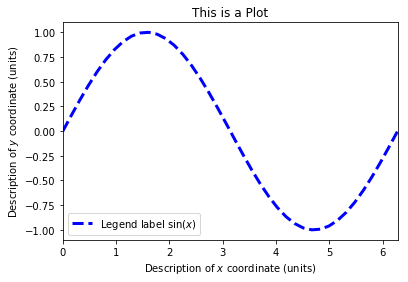

In [16]:
# Silly example data
bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True)
bp_y = np.sin(bp_x)

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"This is a Plot")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

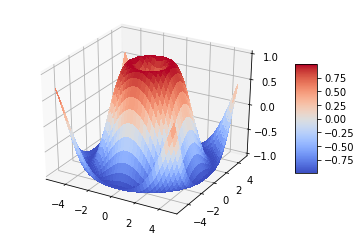

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Silly example data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Make the plot
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import matplotlib as mpl
mpl.use("Agg")  # Must come after importing mpl, but before importing plt
import matplotlib.pyplot as plt